In [7]:
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import glob
import os

In [9]:
from topaz.utils.data.loader import load_image

# Topaz-Denoise: micrograph denoising

This tutorial walks through using 'topaz denoise' with the pretrained general denoising models to denoise raw micrographs and also demos how to train a new denoising model on your own data.

__Topaz is assumed to be installed in a conda environment named "topaz" for purposes of running topaz commands within bash cells.__ If topaz was installed in some other way, then the "source activate topaz" lines will need to be removed or changed below.

### Demo dataset

The tutorial dataset can be downloaded [here](http://bergerlab-downloads.csail.mit.edu/topaz/topaz-tutorial-data.tar.gz) and should be unpacked directly in this (the tutorial) directory.

```
wget http://bergerlab-downloads.csail.mit.edu/topaz/topaz-tutorial-data.tar.gz
tar -xzvf topaz-tutorial-data.tar.gz
```


In [1]:
%%bash
# we'll put the denoised micrographs in a directory called data/EMPIAR-10025/denoised
mkdir -p data/EMPIAR-10025/denoised

# Using topaz denoise

Topaz denoise can be used to denoise micrographs using a variety of denoising methods, including pretrained neural network denoising models.

To see the full set of options for topaz denoise, run
```
topaz denoise --help
```

Here, we will cover some of the key options for using topaz denoise with the pretrained denoising models.

### Required argument

{micrographs} <br/>
The list of paths to the micrographs to denoise.

-o\--output {} <br/>
The directory to which denoised micrographs will be saved.

### Optional, but useful, arguments

--suffix {} <br/>
Add this suffix to each output micrograph file path.

--format {} <br/>
What format to save the output micrographs in. Options are mrc, tiff, png, and jpg. Accepts a comma separated list of formats, all of which will be output.

--normalize <br/>
Apply affine normalization (i.e. subtract mean and divide by standard deviation) of each denoised micrograph before saving it.

### Denoising options

-m/--model {} <br/>
Which pretrained denoising model to use. Also accepts the file path of a custom trained denoising model (see below for details on training). Options are unet, unet-small, fcnn, affine, and none. When set to none, no pretrained denoising model is used which is useful for performing only low-pass/Gaussian denoising.

--lowpass {} <br/>
Apply a low-pass filter to the micrographs that bins the micrograph by the specified factor.

--gaussian {} <br/>
Applies a Gaussian filter to the micrographs with standard deviation (in pixels) specified by the argument.

--inv-gaussian {} <br/>
Applies an inverse Gaussian filter to the micrographs with standard deviation (in pixels) specified by the argument.

### Processing efficiency options

-d/--device {} <br/>
Sets which GPU to use. Set to -1 to only use CPU.

-s/--patch-size {} <br/>
Process each micrograph in patches of this size. This is useful when using GPU processing and the micrographs are too large to be denoised in one shot on your GPU.

-p/--patch-padding {} <br/>
Used with patch size, this sets how much additional padding to add to each patch to prevent edge artifacts when stitching them back together.

## Pretrained model details

The pretrained models provided with topaz denoise are:

- unet: the full U-net model (default model)
- unet-small: the small U-net model
- fcnn: the fully convolutional neural network model
- affine: a simple linear denoising model
- unet-v0.2.1: the full U-net model included with topaz version 0.2.1

## Denoising with the pretrained models

In [5]:
%%bash
source activate topaz-pytorch11
# denoise the EMPIAR-10025 micrographs with the full U-net model
# we set the patch size to 2048 to prevent running out of GPU RAM (these micrographs are large)
topaz denoise --patch-size 1024 -o data/EMPIAR-10025/denoised/ data/EMPIAR-10025/rawdata/micrographs/*.mrc

# using device=0 with cuda=True
# Loading model: unet
# 30 of 30 completed.


### Visualize an example

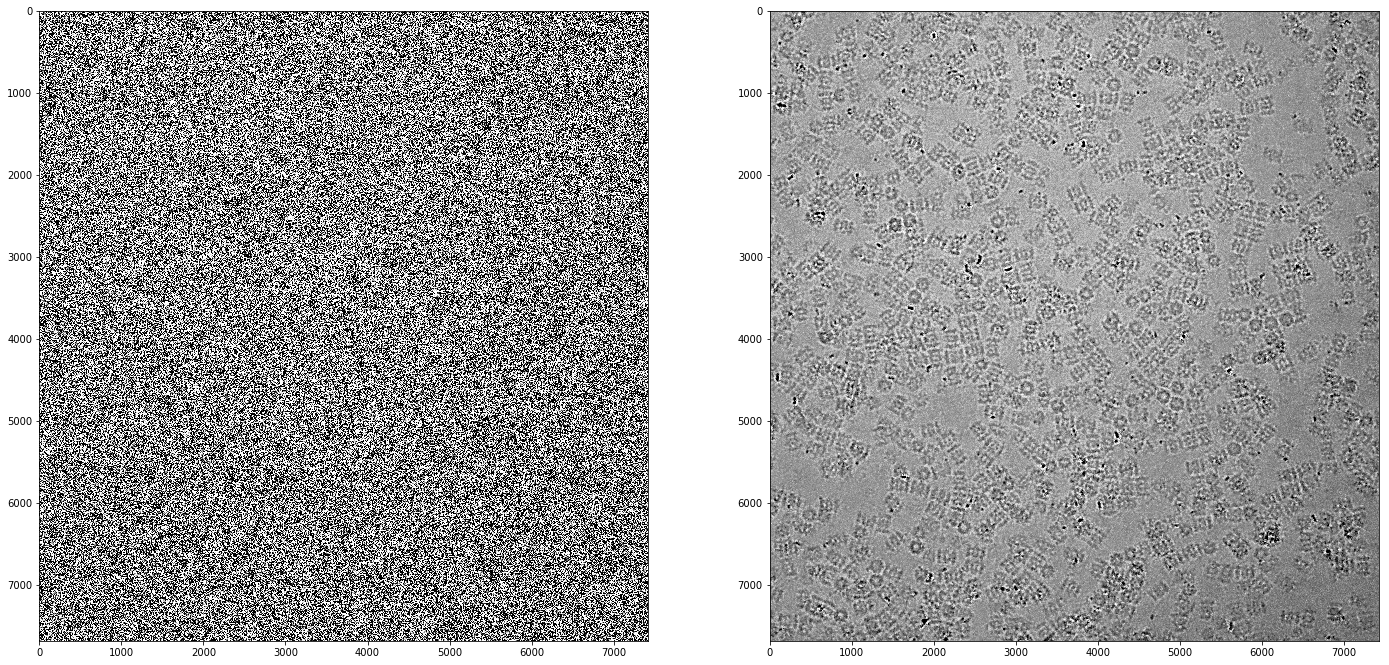

In [13]:
name = '14sep05c_c_00007gr_00013sq_00009hl_00002es_c'

# load the raw micrograph
mic_raw = np.array(load_image('data/EMPIAR-10025/rawdata/micrographs/' + name + '.mrc'), copy=False)
# load the denoised micrograph
mic_dn = np.array(load_image('data/EMPIAR-10025/denoised/' + name + '.mrc'), copy=False)

# scale them for visualization
mu = mic_dn.mean()
std = mic_dn.std()

mic_raw = (mic_raw - mu)/std
mic_dn = (mic_dn - mu)/std

_,ax = plt.subplots(1,2,figsize=(24,12))

ax[0].imshow(mic_raw, vmin=-4, vmax=4, cmap='Greys_r')
ax[1].imshow(mic_dn, vmin=-4, vmax=4, cmap='Greys_r')

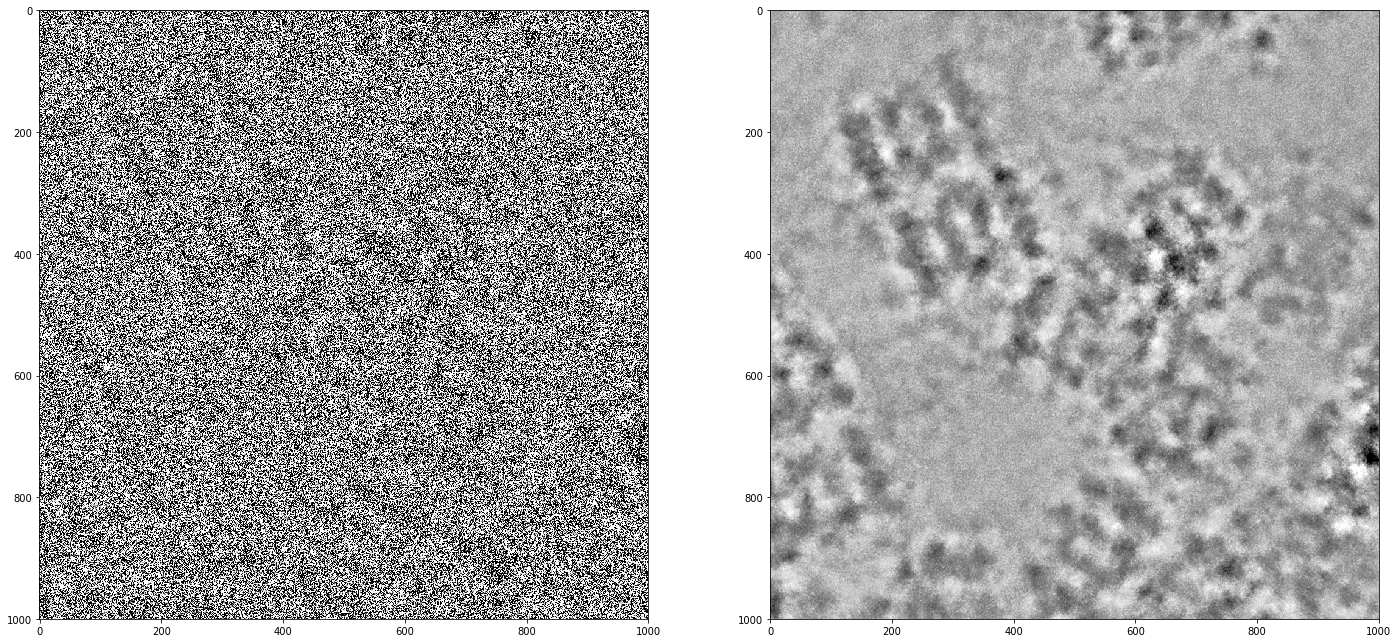

In [14]:
## look at a detail of the micrograph
crop = (2000,3000,3500,4500)

_,ax = plt.subplots(1,2,figsize=(24,12))

ax[0].imshow(mic_raw[crop[0]:crop[1],crop[2]:crop[3]], vmin=-4, vmax=4, cmap='Greys_r')
ax[1].imshow(mic_dn[crop[0]:crop[1],crop[2]:crop[3]], vmin=-4, vmax=4, cmap='Greys_r')

## Denoising model training

TBD